# Shafts

In [1]:
import numpy as np
import pyvista as pv
import geopandas as gpd
from geometron.geom_to_vtk import gdf_to_ug

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Importation of the geopackage as a dat frame

In [2]:
gds = gpd.read_file('../../../../data/Shaft.gpkg')

Definition of the radius of the tube of the shaft

In [3]:
gds['radius']=5

Determine the unique data with a unique name

In [4]:
names = gds['Nom'].unique()

For each unique name, a loop returns the coordinates of the shafts points which has this unique name. 
A spline is created for each group of points. 
This spline is then transformed into a tube.

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


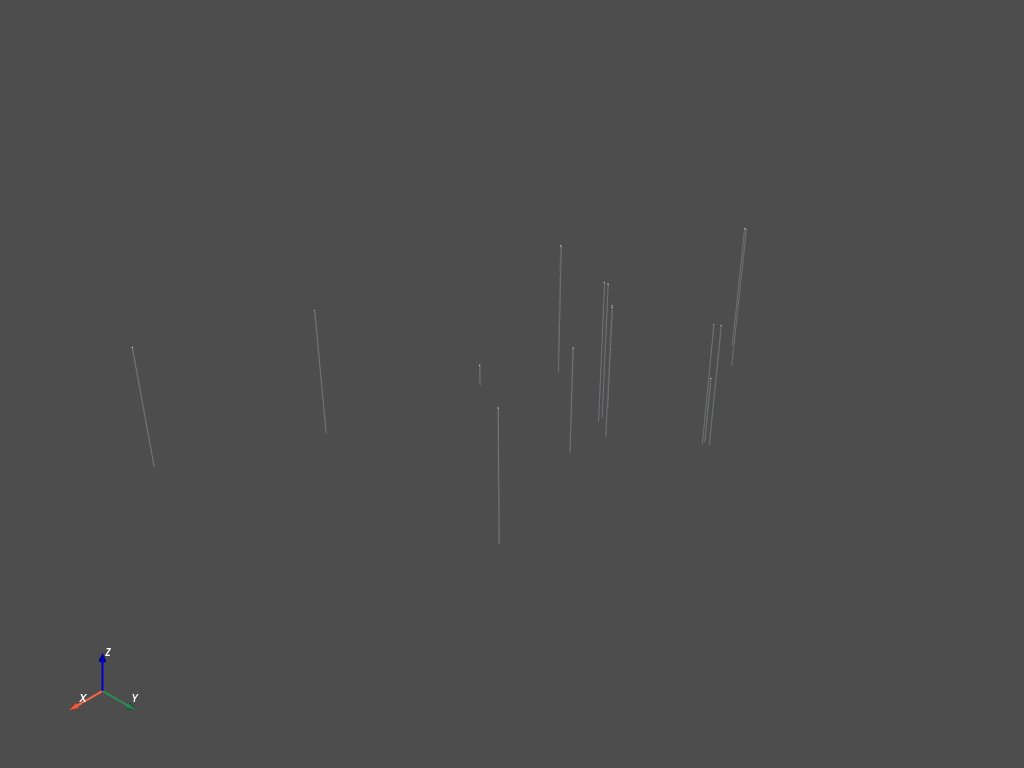

In [5]:
shafts = []
for i in names:
    radius = gds.query(f'Nom=="{i}"').radius.mean()
    vertices = np.array([(i.x, i.y, i.z) for i in gds.query(f'Nom=="{i}"').geometry.values])
    line = pv.Spline(vertices)
    shafts.append(line.tube(radius=radius))
shafts = pv.MultiBlock(shafts)

shafts.plot()
#shafts.save('./tmp_files/galeries.vtm',binary=False)